In [5]:
import uproot
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import math 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel

In [7]:
num_round_polm80=200
num_round_polp80=200
num_plot_polm80_min=0
num_plot_polm80_max=0
num_plot_polp80_min=0
num_plot_polp80_max=0

In [145]:
#H1_mass_array= tree_polm80_hhz_signal.array("comb_jet1_mass")
file_polm80_hhz_signal=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14364.root")
file_polm80_hzqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hzqq_13391.root")
file_polm80_ee_qq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qq_13399_to_13402.root")
file_polm80_ee_qqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqq_13394_to_13397.root")
file_polm80_ee_qqqqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqqqq.root")
file_polm80_WWH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_WWH_qqqqH_14734.root")
file_polm80_ZZH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ZZH_qqqqH_14726.root")


tree_polm80_hhz_signal = file_polm80_hhz_signal["MVATrainingVariables"]
tree_polm80_hhz_signal.keys()
tree_polm80_hzqq_BG = file_polm80_hzqq_BG["MVATrainingVariables"]
tree_polm80_hzqq_BG = file_polm80_hzqq_BG["MVATrainingVariables"]
tree_polm80_ee_qq_BG = file_polm80_ee_qq_BG["MVATrainingVariables"]
tree_polm80_ee_qqqq_BG = file_polm80_ee_qqqq_BG["MVATrainingVariables"]
tree_polm80_ee_qqqqqq_BG = file_polm80_ee_qqqqqq_BG["MVATrainingVariables"]
tree_polm80_WWH_qqqqH_BG = file_polm80_WWH_qqqqH_BG["MVATrainingVariables"]
tree_polm80_ZZH_qqqqH_BG = file_polm80_ZZH_qqqqH_BG["MVATrainingVariables"]
#H1_mass_array= tree_polm80_hhz_signal.array("comb_jet1_mass")
#feature: jet6_theta, importance: 0.006951884366571903
#feature: jet4_theta, importance: 0.0081394137814641
#feature: jet5_theta, importance: 0.008377623744308949
#feature: jet4_E, importance: 0.008673656731843948
#feature: comb_jet2_BTagMax, importance: 0.008875861763954163
#feature: jet3_E, importance: 0.009489532560110092

#feature: jet6_theta, importance: 0.007176658604294062
#feature: jet4_E, importance: 0.007868878543376923
#feature: jet5_theta, importance: 0.00789350364357233
#feature: jet4_theta, importance: 0.00875063892453909
#feature: comb_jet3_BTagMax, importance: 0.009214065968990326
#feature: comb_jet2_BTagMax, importance: 0.009325340390205383


df_polm80_HHZ=tree_polm80_hhz_signal.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
#df_polm80_HHZ=df_polm80_HHZ.drop(['jet6_theta', 'jet6_E','jet4_theta','jet4_E','jet3_E'], axis=1)
df_polm80_HHZ[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[1,0,0,0,0,0,0]], index=df_polm80_HHZ.index)
df_polm80_HHZ.to_csv("dataframe_polm80_SIG.csv")
df_polm80_BG=tree_polm80_hzqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
#drop less important features <1 % and check
df_polm80_BG[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,1,0,0,0,0,0]], index=df_polm80_BG.index)
df_polm80_ee_qq=tree_polm80_ee_qq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ee_qq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,1,0,0,0,0]], index=df_polm80_ee_qq.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ee_qq,ignore_index=True)
df_polm80_ee_qqqq=tree_polm80_ee_qqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ee_qqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,1,0,0,0]], index=df_polm80_ee_qqqq.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ee_qqqq,ignore_index=True)
df_polm80_ee_qqqqqq=tree_polm80_ee_qqqqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ee_qqqqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,1,0,0]], index=df_polm80_ee_qqqqqq.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ee_qqqqqq,ignore_index=True)
df_polm80_WWH_qqqqH=tree_polm80_WWH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_WWH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,1,0]], index=df_polm80_WWH_qqqqH.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_WWH_qqqqH,ignore_index=True)
df_polm80_ZZH_qqqqH=tree_polm80_ZZH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ZZH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,0,1]], index=df_polm80_ZZH_qqqqH.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ZZH_qqqqH,ignore_index=True)
#df_polm80_BG=df_polm80_BG.drop(['jet6_theta', 'jet6_E','jet4_theta','jet4_E','jet3_E'], axis=1)
#polm80 after loop best result now for thresh 0 1.9231107313597056 7.1626043831929564 6.709212450077757
#using ALL the variables
#Sig, BG, sum, metric 4.672464674082233 9.709791960194707 14.489369597285986 24.199161557480693 1.973830090641824 1.9844308321733362
#but also that
#polm80 after loop best result now for thresh 0 2.0675560241257993 4.746041810140014 0.5232050677295774



#drop weight column here
Y_polm80_HHZ=np.ones((df_polm80_HHZ.shape[0],1))
#print("shape of data frame BG after",df_polm80_BG.shape,df_polm80_BG.tail())
Y_polm80_BG=np.zeros((df_polm80_BG.shape[0],1))
#print ("polm80 shape of Ysig, back",Y_polm80_HHZ.shape,Y_polm80_BG.shape)
df_polm80_HHZ.head()
df_polm80_total=df_polm80_HHZ.append(df_polm80_BG,ignore_index=True)



y_polm80_total=np.append(Y_polm80_HHZ,Y_polm80_BG)
X_polm80_total=np.asarray(df_polm80_total)
test_size_polm80=0.2
X_polm80_train, X_polm80_test, y_polm80_train, y_polm80_test = train_test_split(df_polm80_total, y_polm80_total, test_size=test_size_polm80)
print("polm80 shape of X_train/X_test/y_train/y_test",X_polm80_train.shape, X_polm80_test.shape, y_polm80_train.shape, y_polm80_test.shape)

sel_HHZ_polm80_train=X_polm80_train['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polm80_train=X_polm80_train['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polm80_train=X_polm80_train['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polm80_train=X_polm80_train['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polm80_train=X_polm80_train['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polm80_train=X_polm80_train['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polm80_train=X_polm80_train['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_HHZ_polm80_test=X_polm80_test['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polm80_test=X_polm80_test['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polm80_test=X_polm80_test['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polm80_test=X_polm80_test['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polm80_test=X_polm80_test['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polm80_test=X_polm80_test['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polm80_test=X_polm80_test['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)

#last 7 columns should be all labelling of the different samples, so take it out to define the matrix
data_polm80_train=X_polm80_train.iloc[:,1:-7]

weight_polm80_train = X_polm80_train.iloc[:,0]
weight_polm80_test = X_polm80_test.iloc[:,0]
weight_polm80_array_test=np.asarray(weight_polm80_test)
weight_polm80_array_train=np.asarray(weight_polm80_train)

weights_polm80_test_B=np.ma.masked_where(y_polm80_test==1,weight_polm80_array_test)
weights_polm80_test_S=np.ma.masked_where(y_polm80_test==0,weight_polm80_array_test)
#print("test all weights",np.sum(weight_polm80_array_test),np.sum(weights_polm80_test_B),np.sum(weights_polm80_test_S))

sum_wpos_train_polm80 = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_train_polm80 = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)
sum_tot_hhz_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_HHZ_polm80_train[i]==1)
sum_tot_hzqq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_hzqq_polm80_train[i]==1)
sum_tot_ee_qq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ee_qq_polm80_train[i]==1)
sum_tot_ee_qqqq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ee_qqqq_polm80_train[i]==1)
sum_tot_ee_qqqqqq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ee_qqqqqq_polm80_train[i]==1)
sum_tot_WWH_qqqqH_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_WWH_qqqqH_polm80_train[i]==1)
sum_tot_ZZH_qqqqH_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ZZH_qqqqH_polm80_train[i]==1)

sum_tot_hhz_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_HHZ_polm80_test[i]==1)
sum_tot_hzqq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_hzqq_polm80_test[i]==1)
sum_tot_ee_qq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ee_qq_polm80_test[i]==1)
sum_tot_ee_qqqq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ee_qqqq_polm80_test[i]==1)
sum_tot_ee_qqqqqq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ee_qqqqqq_polm80_test[i]==1)
sum_tot_WWH_qqqqH_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_WWH_qqqqH_polm80_test[i]==1)
sum_tot_ZZH_qqqqH_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ZZH_qqqqH_polm80_test[i]==1)


sum_wpos_test_polm80 = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_test_polm80 = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_train_polm80/sum_wneg_train_polm80 
recale_polm80_test_SIG=sum_wpos_train_polm80/sum_wpos_test_polm80
recale_polm80_test_BG=sum_wpos_train_polm80/sum_wneg_test_polm80

scale_pos_weight_train_polm80 = sum_wneg_train_polm80/sum_wpos_train_polm80
data_polm80_test=X_polm80_test.iloc[:,1:-7]

polm80 shape of X_train/X_test/y_train/y_test (82924, 41) (20732, 41) (82924,) (20732,)


In [ ]:
xgmat_polm80_train = xgb.DMatrix( data_polm80_train, label=y_polm80_train, missing = -999.0, weight=weight_polm80_train )
xgmat_polm80_test = xgb.DMatrix( data_polm80_test, missing = -999.0, weight=weight_polm80_test )
watchlist_polm80 = [(xgmat_polm80_train, 'train'), (xgmat_polm80_test , 'validation')]
#param_polm80 = {'seed': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 'eta': 0.05, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polm80, 'eval_metric': ['error','auc'],'evals': watchlist_polm80, 'early_stopping_round': 10,
#                'gamma': 0, 'min_child_weight': 1,'lambda': 1, 'alpha': 0,'tree_method':'exact','subsample':1,
#                'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1}
param_polm80 = {'seed': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 'eta': 0.05, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polm80, 'eval_metric': ['error','auc'],'evals': watchlist_polm80, 'early_stopping_round': 10,
                'gamma': 0, 'min_child_weight': 1,'lambda': 1, 'alpha': 0,'tree_method':'exact','subsample':1,
                'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1}
#    parameters = {
#        'num_boost_round': [100, 250, 500],
#        'eta': [0.05, 0.1, 0.3],
#        'max_depth': [6, 9, 12],
#        'subsample': [0.9, 1.0],
#        'colsample_bytree': [0.9, 1.0],
#    }
#    clf = GridSearchCV(clf, parameters, n_jobs=1, cv=2)



print("before training polm80")
XGB_Model_polm80 =xgb.train(param_polm80,xgmat_polm80_train,num_boost_round=num_round_polm80,verbose_eval=True)
print("after training polm80")

In [ ]:
XGB_Model_polm80.save_model("/Users/matthiasweber/jupytermacros/HHZModel_polm80.model")
modelfile_polm80 = '/Users/matthiasweber/jupytermacros/HHZModel_polm80.model'
print('model saved')
cross_val_polm80 = xgb.cv(param_polm80,xgmat_polm80_train, num_boost_round=num_round_polm80, nfold=10, early_stopping_rounds=10, metrics=['error','auc'], verbose_eval=True)

if XGB_Model_polm80.best_ntree_limit != num_round_polm80 :
    print("after training polpm0 found cutoff",XGB_Model_polm80.best_score,XGB_Model_polm80.best_ntree_limit,XGB_Model_polm80.best_iteration)
else:
    print("after training polm80",XGB_Model_polm80.best_ntree_limit,XGB_Model_polm80.best_iteration)

In [146]:
XGB_Model_polm80_sklearn =xgb.XGBClassifier()
param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
                    'subsample':1,'importance_type': "gain",'verbosity': 2,
                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
                    'n_estimators': num_round_polm80}
XGB_Model_polm80_sklearn.set_params(**param_polm80_skl)
#XGB_Model_polm80_sklearn.set_params(random_state=7,tree_method="exact",max_delta_step=0,n_estimators =num_round_polm80, scale_pos_weight=scale_pos_weight_train_polm80, max_depth=6, learning_rate=0.05, objective='binary:logitraw',n_jobs=4, verbosity=2,importance_type="gain",
#                                            gamma= 0, min_child_weight=1,reg_lambda= 1,reg_alpha=0,base_score=0.5,
#                                    subsample=1,colsample_bytree=1,colsample_bylevel=1,colsample_bynode=1.0)
print("before fittin sklearn polm80")
#XGB_Model_polm80_sklearnfit=XGB_Model_polm80_sklearn.fit(X=data_polm80_train, y=y_polm80_train, sample_weight=weight_polm80_train, early_stopping_rounds=10)
XGB_Model_polm80_sklearnfit=XGB_Model_polm80_sklearn.fit(X=data_polm80_train, y=y_polm80_train, sample_weight=weight_polm80_train, sample_weight_eval_set=[weight_polm80_train,weight_polm80_test],eval_metric= ['error','auc'],eval_set=[(data_polm80_train,y_polm80_train),(data_polm80_test,y_polm80_test)], early_stopping_rounds=10)
print("after fitting sklearn polm80",XGB_Model_polm80_sklearnfit.best_score,XGB_Model_polm80_sklearnfit.best_ntree_limit,XGB_Model_polm80_sklearnfit.best_iteration)
#evals_result_polm80_sklearn = XGB_Model_polm80_sklearn.evals_result()
XGB_Model_polm80_sklearn_le = LabelEncoder().fit(y_polm80_test)
#ypred_polm80_test_skl_1 = XGB_Model_polm80_sklearn.predict(data_polm80_test)
modelfile_polm80_sklearn="/Users/matthiasweber/jupytermacros/HHZModel_polm80_skl_BTag3_2_20.model"
XGB_Model_polm80_sklearn.save_model(modelfile_polm80_sklearn)
#print("eval results",evals_result_polm80_sklearn)
#print("feature importance",XGB_Model_polm80_sklearn.feature_importances_)

before fittin sklearn polm80
[00:20:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[0]	validation_0-error:0.001923	validation_0-auc:0.886804	validation_1-error:0.002055	validation_1-auc:0.860397
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[00:20:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[1]	validation_0-error:0.001923	validation_0-auc:0.899439	validation_1-error:0.002055	validation_1-auc:0.873847
[00:20:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[2]	validation_0-error:0.001923	validation_0-auc:0.902757	validation_1-error:0.002055	validation_1-auc:0.876109
[00:20:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[3

[00:20:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[35]	validation_0-error:0.056773	validation_0-auc:0.941969	validation_1-error:0.068496	validation_1-auc:0.911204
[00:20:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[36]	validation_0-error:0.056441	validation_0-auc:0.942536	validation_1-error:0.066974	validation_1-auc:0.911479
[00:20:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[37]	validation_0-error:0.056074	validation_0-auc:0.943062	validation_1-error:0.066297	validation_1-auc:0.912122
[00:20:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[38]	validation_0-error:0.055821	validation_0-auc:0.943693	validation_1-error:0.067384	validation_1-auc:0.912578
[00:20:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots

[00:20:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[71]	validation_0-error:0.054363	validation_0-auc:0.957857	validation_1-error:0.066145	validation_1-auc:0.923363
[00:20:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[72]	validation_0-error:0.054803	validation_0-auc:0.958141	validation_1-error:0.0663	validation_1-auc:0.923451
[00:20:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[73]	validation_0-error:0.05439	validation_0-auc:0.958474	validation_1-error:0.066	validation_1-auc:0.923629
[00:20:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[74]	validation_0-error:0.054137	validation_0-auc:0.959008	validation_1-error:0.06617	validation_1-auc:0.923906
[00:20:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 ext

[00:21:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[107]	validation_0-error:0.050908	validation_0-auc:0.967889	validation_1-error:0.064498	validation_1-auc:0.928081
[00:21:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[108]	validation_0-error:0.050845	validation_0-auc:0.968024	validation_1-error:0.065251	validation_1-auc:0.928157
[00:21:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[109]	validation_0-error:0.050664	validation_0-auc:0.968296	validation_1-error:0.064233	validation_1-auc:0.928222
[00:21:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[110]	validation_0-error:0.050562	validation_0-auc:0.968468	validation_1-error:0.064322	validation_1-auc:0.928244
[00:21:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 root

[00:21:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[143]	validation_0-error:0.048136	validation_0-auc:0.973668	validation_1-error:0.063645	validation_1-auc:0.930221
[00:21:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[144]	validation_0-error:0.048268	validation_0-auc:0.973866	validation_1-error:0.063397	validation_1-auc:0.930265
[00:21:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[145]	validation_0-error:0.048272	validation_0-auc:0.974006	validation_1-error:0.063335	validation_1-auc:0.930334
[00:21:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[146]	validation_0-error:0.048283	validation_0-auc:0.974071	validation_1-error:0.063398	validation_1-auc:0.930365
[00:21:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 root

[00:21:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[179]	validation_0-error:0.045857	validation_0-auc:0.978079	validation_1-error:0.060845	validation_1-auc:0.931784
[00:21:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[180]	validation_0-error:0.045747	validation_0-auc:0.978151	validation_1-error:0.060766	validation_1-auc:0.931802
[00:21:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[181]	validation_0-error:0.045724	validation_0-auc:0.978212	validation_1-error:0.060762	validation_1-auc:0.93183
[00:21:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[182]	validation_0-error:0.045661	validation_0-auc:0.978331	validation_1-error:0.060192	validation_1-auc:0.931914
[00:21:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots,

In [ ]:
#param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polm80}
param_polm80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
                           'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
                           'reg_lambda': 1, 'tree_method':'exact','subsample':1,'importance_type': "gain",
                           'verbosity': 2,'colsample_bylevel':1,'colsample_bynote': 1,
                           #'n_estimators': num_round_polm80,
                           'n_estimators': 10,
                           'gamma': 0, 'learning_rate': 0.05,'reg_lambda': 1,'reg_alpha': 0,'colsample_bytree':1
                          }
param_polm80_grid = {
    'max_depth': [4,5,6,7,8],
    'min_child_weight': [1,3,5,7]
}
    
#param_polm80_grid = {'max_depth': [4,5,6,7,8], 'learning_rate': [0.05,0.10,0.15,0.20,0.25], 
#                    'gamma': [0,0.1,0.2,0.3,0.4], 'min_child_weight': [1,3,5,7],'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100],
#                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polm80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polm80_sklearn_grid.set_params(**param_polm80_skl_nogrid)
print("non grid search parameters")
gridsearch_polm80_skl=GridSearchCV(estimator = XGB_Model_polm80_sklearn_grid,param_grid=param_polm80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=5,)
print("after grid search parameter definition")
fit_params_polm80_grid={'sample_weight': weight_polm80_train}
gridsearch_polm80_skl.fit(data_polm80_train,y_polm80_train,**fit_params_polm80_grid)
print("get into fitting")
gridsearch_polm80_skl.grid_scores_, gridsearch_polm80_skl.best_params_, gridsearch_polm80_skl.best_score_

In [ ]:
#param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polm80}
param_polm80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
                           'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
                           'reg_lambda': 1, 'tree_method':'exact','subsample':1,'importance_type': "gain",
                           'verbosity': 3,'colsample_bylevel':1,'colsample_bynote': 1,
                           'n_estimators': num_round_polm80,'max_depth': 7, 'min_child_weight': 7,
                           #'n_estimators': 10,
                           'gamma': 0, 'colsample_bytree':1,
                           'learning_rate': 0.05,
                           'reg_lambda': 1
                           ,'reg_alpha': 0
                          }
param_polm80_grid = {
    'gamma': [0,0.1,0.2,0.33,0.4,0.5]
    'colsample_bytree': [0.5,0.7,0.8,1.0]
}
    
#param_polm80_grid = {'max_depth': [4,5,6,7,8], 'learning_rate': [0.05,0.10,0.15,0.20,0.25], 
#                    'gamma: [0,0.1,0.2,0.33,0.4,0.5], 'min_child_weight': [1,3,5,7],'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100],
#                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polm80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polm80_sklearn_grid.set_params(**param_polm80_skl_nogrid)
print("non grid search parameters")
gridsearch_polm80_skl=GridSearchCV(estimator = XGB_Model_polm80_sklearn_grid,param_grid=param_polm80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=2,verbose=3)
print("after grid search parameter definition")
fit_params_polm80_grid={'sample_weight': weight_polm80_train}
gridsearch_polm80_skl.fit(data_polm80_train,y_polm80_train,**fit_params_polm80_grid)
print("get into fitting")
gridsearch_polm80_skl.cv_results_
gridsearch_polm80_skl.best_params_, gridsearch_polm80_skl.best_score_

In [ ]:
#param_polp80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polp80}
param_polp80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
                           'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
                           'reg_lambda': 1, 'tree_method':'exact','subsample':1,'importance_type': "gain",
                           'verbosity': 3,'colsample_bylevel':1,'colsample_bynote': 1,
                           'n_estimators': num_round_polp80, 'max_depth': 9, 'min_child_weight': 3,
                           #'n_estimators': 10,
                           'gamma': 0.33, 'colsample_bytree':0.5,'learning_rate': 0.15,'reg_lambda': 1,'reg_alpha': 1
                          }
param_polp80_grid = {
    'learning_rate': [0.05,0.10,0.15,0.20],
    'reg_alpha': [0,0.2,0.3,0.4,0.5, 1]
}
    
#param_polp80_grid = {'max_depth': [4,5,6,7,8], 'learning_rate': [0.05,0.10,0.15,0.20,0.25], 
#                    'gamma': [0,0.1,0.2,0.3,0.4], 'min_child_weight': [1,3,5,7],'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100],
#                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polp80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polp80_sklearn_grid.set_params(**param_polp80_skl_nogrid)
print("non grid search parameters")
gridsearch_polp80_skl=GridSearchCV(estimator = XGB_Model_polp80_sklearn_grid,param_grid=param_polp80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=2,verbose=3)
print("after grid search parameter definition")
fit_params_polp80_grid={'sample_weight': weight_polp80_train}
gridsearch_polp80_skl.fit(data_polp80_train,y_polp80_train,**fit_params_polp80_grid)
print("get into fitting")
gridsearch_polp80_skl.cv_results_
gridsearch_polp80_skl.best_params_, gridsearch_polp80_skl.best_score_

In [153]:
bst_polm80_sklearn = xgb.XGBClassifier()
bst_polm80_sklearn.load_model(modelfile_polm80_sklearn)
bst_polm80_sklearn._le = LabelEncoder().fit(y_polm80_test)
print("predict test")
ypred_polm80_test_skl = bst_polm80_sklearn.predict(data_polm80_test,output_margin=True)
print("predict train")
ypred_polm80_train_skl = bst_polm80_sklearn.predict(data_polm80_train,output_margin=True)
#print("eval results",evals_result_polm80_sklearn)
print("feature importance",XGB_Model_polm80_sklearn.feature_importances_)
ordered_features_polm80=zip(data_polm80_train.columns, XGB_Model_polm80_sklearn.feature_importances_)
#print(ordered_features)
ordered_features_polm80=sorted(ordered_features_polm80,key = lambda z: z[1])
importance_list_sorted_polm80=XGB_Model_polm80_sklearn.feature_importances_
importance_list_sorted_polm80=sorted(importance_list_sorted_polm80)
for t in importance_list_sorted_polm80:
    print('threshold',t)
print("before loop")
for feat, importance in ordered_features_polm80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

ypred_polm80_test_skl_S=np.ma.masked_where(y_polm80_test==0,ypred_polm80_test_skl)
ypred_polm80_train_skl_S=np.ma.masked_where(y_polm80_train==0,ypred_polm80_train_skl)

num_plot_polm80_max=1.2*max(np.max(ypred_polm80_train_skl_S),np.max(ypred_polm80_test_skl_S))

test_bins_BDT_polm80=200
range_pred_polm80=np.max(ypred_polm80_train_skl_S)-np.min(ypred_polm80_train_skl_S)
pred_lim_polm80= np.linspace(np.min(ypred_polm80_train_skl_S)+0.50*range_pred_polm80,np.min(ypred_polm80_train_skl_S)+0.95*range_pred_polm80,test_bins_BDT_polm80, endpoint=True)
max_sig_polm80_skl=0
max_sig_polm80_skl_j=0
SIG_j=0
BG_j=0
for j in range (len(pred_lim_polm80)):
    count_tot_hhz_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==1 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]))
    count_tot_BG_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==0 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]))
    print("Sig, BG, sum, metric",pred_lim_polm80[j],1./test_size_polm80*count_tot_hhz_test_polm80_skl,1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl),max_sig_polm80_skl)
    if (1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl)>0 and (1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl))>max_sig_polm80_skl :
        max_sig_polm80_skl=1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl)
        max_sig_polm80_skl_j=j       
        SIG_j=1./test_size_polm80*count_tot_hhz_test_polm80_skl
        BG_j=1./test_size_polm80*count_tot_BG_test_polm80_skl
print("polm80 threshold 0",pred_lim_polm80[max_sig_polm80_skl_j],max_sig_polm80_skl_j,"result",max_sig_polm80_skl,SIG_j,BG_j)
best_threshold=0
"""
for importance in importance_list_sorted_polm80:
    print("begin of polm80 threshold",importance)
    # select features using threshold
    selection_polm80 = SelectFromModel(XGB_Model_polm80_sklearn, threshold=importance, prefit=True)
    select_X_train_polm80 = selection_polm80.transform(data_polm80_train)
    # train model
    selection_model_polm80 = xgb.XGBClassifier()
    selection_model_polm80.fit(select_X_train_polm80, y_polm80_train)
    # eval model
    select_X_test_polm80 = selection_polm80.transform(data_polm80_test)
    ypred_sel_polm80_test_skl = selection_model_polm80.predict(select_X_test_polm80,output_margin=True)
    ypred_sel_polm80_test_skl_S=np.ma.masked_where(y_polm80_test==0,ypred_sel_polm80_test_skl)
    range_sel_pred_polm80=np.max(ypred_sel_polm80_test_skl_S)-np.min(ypred_sel_polm80_test_skl_S)
    pred_sel_lim_polm80= np.linspace(np.min(ypred_sel_polm80_test_skl_S)+0.70*range_sel_pred_polm80,np.min(ypred_sel_polm80_test_skl_S)+0.95*range_sel_pred_polm80,test_bins_BDT_polm80, endpoint=True)
    
    for j in range (len(pred_sel_lim_polm80)):
        count_tot_hhz_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==1 and ypred_sel_polm80_test_skl[i]>pred_sel_lim_polm80[j]))
        count_tot_BG_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==0 and ypred_sel_polm80_test_skl[i]>pred_sel_lim_polm80[j]))
        print("sig,BG,sum, metric",pred_sel_lim_polm80[j],1./test_size_polm80*count_tot_hhz_test_polm80_skl,1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl),max_sig_polm80_skl)
        if (1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl) and ((1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl))>max_sig_polm80_skl):
            max_sig_polm80_skl=1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl)
            max_sig_polm80_skl_j=j
            SIG_j=1./test_size_polm80*count_tot_hhz_test_polm80_skl
            BG_j=1./test_size_polm80*count_tot_BG_test_polm80_skl
            best_threshold=importance
    print("polm80 threshold",importance,pred_sel_lim_polm80[max_sig_polm80_skl_j],max_sig_polm80_skl_j," best thresh",best_threshold,"results",max_sig_polm80_skl,SIG_j,BG_j)
"""
print("polm80 after loop best result now for thresh",best_threshold,max_sig_polm80_skl,SIG_j,BG_j)

predict test
predict train
feature importance [0.06673758 0.0320511  0.01672419 0.01403683 0.00987398 0.02448137
 0.02857589 0.03379699 0.01998368 0.04202265 0.02275854 0.01751602
 0.01811899 0.03319401 0.02261421 0.02042163 0.03659991 0.0155545
 0.01345377 0.20243943 0.1105222  0.02228193 0.02900749 0.01651562
 0.01089378 0.01765196 0.01986495 0.02144842 0.01748939 0.01292376
 0.00978034 0.01138191 0.00928295]
threshold 0.009282953
threshold 0.009780344
threshold 0.009873977
threshold 0.010893775
threshold 0.011381914
threshold 0.012923757
threshold 0.01345377
threshold 0.014036834
threshold 0.0155545
threshold 0.016515622
threshold 0.016724192
threshold 0.017489394
threshold 0.017516017
threshold 0.017651958
threshold 0.018118989
threshold 0.019864947
threshold 0.019983679
threshold 0.020421632
threshold 0.021448422
threshold 0.022281934
threshold 0.022614215
threshold 0.02275854
threshold 0.024481367
threshold 0.02857589
threshold 0.029007487
threshold 0.0320511
threshold 0.03319400

Sig, BG, sum, metric 2.6248156676939383 14.34697960037738 86.0773788660299 100.42435846640728 1.4316634832934951 1.4193777481513306
Sig, BG, sum, metric 2.6450104059286454 14.259896264411509 82.77816424611956 97.03806051053107 1.4475891266774992 1.4316634832934951
Sig, BG, sum, metric 2.665205144163352 14.194583762437105 82.27418245980516 96.46876622224227 1.4452044822120687 1.4475891266774992
Sig, BG, sum, metric 2.685399882398059 14.04218792449683 81.49762710672803 95.53981503122486 1.436622231433009 1.4475891266774992
Sig, BG, sum, metric 2.7055946206327657 13.93333375453949 78.85992033523507 92.79325408977456 1.446428058061557 1.4475891266774992
Sig, BG, sum, metric 2.7257893588674724 13.780937916599214 77.43765769642778 91.21859561302699 1.442902830657219 1.4475891266774992
Sig, BG, sum, metric 2.7459840971021796 13.672083746641874 66.77431548130699 80.44639922794886 1.5243384519385959 1.4475891266774992
Sig, BG, sum, metric 2.7661788353368864 13.476146240718663 66.14673042786308 

Sig, BG, sum, metric 3.937473652949884 6.161146019585431 6.1231206834781915 12.284266703063622 1.7578705214558066 1.9292802980900199
Sig, BG, sum, metric 3.957668391184591 6.030521015636623 5.120392338139936 11.15091335377656 1.805924603037809 1.9292802980900199
Sig, BG, sum, metric 3.977863129419298 5.921666845679283 5.120392338139936 11.04205918381922 1.7820461011528792 1.9292802980900199
Sig, BG, sum, metric 3.998057867654005 5.7475001737475395 3.880919375224039 9.628419548971578 1.8522580464216154 1.9292802980900199
Sig, BG, sum, metric 4.018252605888712 5.595104335807264 3.880919375224039 9.476023711031303 1.8175866331153867 1.9292802980900199
Sig, BG, sum, metric 4.038447344123418 5.508020999841392 2.9915793682448566 8.499600368086249 1.889280030078911 1.9292802980900199
Sig, BG, sum, metric 4.0586420823581255 5.333854327909648 2.9915793682448566 8.325433696154505 1.8485777325701107 1.9292802980900199
Sig, BG, sum, metric 4.078836820592832 5.246770991943777 2.9723560868296772 8.2

Sig, BG, sum, metric 5.310715852909951 0.7619791897013783 0.0 0.7619791897013783 0.8729141937793075 1.9878777150689448
Sig, BG, sum, metric 5.330910591144658 0.7402083557099104 0.0 0.7402083557099104 0.8603536224773569 1.9878777150689448
Sig, BG, sum, metric 5.351105329379364 0.7184375217184424 0.0 0.7184375217184424 0.8476069382198582 1.9878777150689448
Sig, BG, sum, metric 5.3713000676140705 0.6966666877269745 0.0 0.6966666877269745 0.834665614319276 1.9878777150689448
Sig, BG, sum, metric 5.391494805848778 0.6748958537355065 0.0 0.6748958537355065 0.8215204524146107 1.9878777150689448
Sig, BG, sum, metric 5.411689544083485 0.6748958537355065 0.0 0.6748958537355065 0.8215204524146107 1.9878777150689448
Sig, BG, sum, metric 5.431884282318192 0.6313541857525706 0.0 0.6313541857525706 0.7945779922402649 1.9878777150689448
Sig, BG, sum, metric 5.452079020552898 0.6095833517611027 0.0 0.6095833517611027 0.7807581903259821 1.9878777150689448
Sig, BG, sum, metric 5.472273758787606 0.5878125

In [148]:
#H1_mass_array= tree_polp80_hhz_signal.array("comb_jet1_mass")
file_polp80_hhz_signal=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14365.root")
file_polp80_hzqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hzqq_13392.root")
file_polp80_ee_qq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qq_13398.root")
file_polp80_ee_qqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqq_13393.root")
file_polp80_ee_qqqqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqqqq.root")
file_polp80_WWH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_WWH_qqqqH_14735.root")
file_polp80_ZZH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ZZH_qqqqH_14727.root")


tree_polp80_hhz_signal = file_polp80_hhz_signal["MVATrainingVariables"]
tree_polp80_hhz_signal.keys()
tree_polp80_hzqq_BG = file_polp80_hzqq_BG["MVATrainingVariables"]
tree_polp80_hzqq_BG = file_polp80_hzqq_BG["MVATrainingVariables"]
tree_polp80_ee_qq_BG = file_polp80_ee_qq_BG["MVATrainingVariables"]
tree_polp80_ee_qqqq_BG = file_polp80_ee_qqqq_BG["MVATrainingVariables"]
tree_polp80_ee_qqqqqq_BG = file_polp80_ee_qqqqqq_BG["MVATrainingVariables"]
tree_polp80_WWH_qqqqH_BG = file_polp80_WWH_qqqqH_BG["MVATrainingVariables"]
tree_polp80_ZZH_qqqqH_BG = file_polp80_ZZH_qqqqH_BG["MVATrainingVariables"]
#H1_mass_array= tree_polp80_hhz_signal.array("comb_jet1_mass")
df_polp80_HHZ=tree_polp80_hhz_signal.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_HHZ[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[1,0,0,0,0,0,0]], index=df_polp80_HHZ.index)
#df_polp80_HHZ=df_polp80_HHZ.drop(['jet6_theta','comb_jet2_BTagMax','jet3_E','jet5_theta','comb_jet3_BTagMax'],axis=1)

#df_polp80_HHZ.to_csv("dataframe_polp80_SIG.csv")
df_polp80_BG=tree_polp80_hzqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_BG[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,1,0,0,0,0,0]], index=df_polp80_BG.index)
df_polp80_ee_qq=tree_polp80_ee_qq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ee_qq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,1,0,0,0,0]], index=df_polp80_ee_qq.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ee_qq,ignore_index=True)
df_polp80_ee_qqqq=tree_polp80_ee_qqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ee_qqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,1,0,0,0]], index=df_polp80_ee_qqqq.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ee_qqqq,ignore_index=True)
df_polp80_ee_qqqqqq=tree_polp80_ee_qqqqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ee_qqqqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,1,0,0]], index=df_polp80_ee_qqqqqq.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ee_qqqqqq,ignore_index=True)
df_polp80_WWH_qqqqH=tree_polp80_WWH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_WWH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,1,0]], index=df_polp80_WWH_qqqqH.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_WWH_qqqqH,ignore_index=True)
df_polp80_ZZH_qqqqH=tree_polp80_ZZH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ZZH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,0,1]], index=df_polp80_ZZH_qqqqH.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ZZH_qqqqH,ignore_index=True)

#df_polp80_BG=df_polp80_BG.drop(['jet6_theta','comb_jet2_BTagMax','jet3_E','jet5_theta','comb_jet3_BTagMax'],axis=1)
#polp80 after loop best result now for thresh 0 0.9289984016367034 1.890362047124654 2.250207132892683

#all variables thres/sigma/signal/tot BG
#polp80 after loop best result now for thresh 0 0.9833914317534157 1.5114568790886551 0.8508628832350951

#drop weight column here
Y_polp80_HHZ=np.ones((df_polp80_HHZ.shape[0],1))
Y_polp80_BG=np.zeros((df_polp80_BG.shape[0],1))
df_polp80_total=df_polp80_HHZ.append(df_polp80_BG,ignore_index=True)
y_polp80_total=np.append(Y_polp80_HHZ,Y_polp80_BG)
X_polp80_total=np.asarray(df_polp80_total)

test_size_polp80=0.2
X_polp80_train, X_polp80_test, y_polp80_train, y_polp80_test = train_test_split(df_polp80_total, y_polp80_total, test_size=0.2, random_state=123)


sel_HHZ_polp80_train=X_polp80_train['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polp80_train=X_polp80_train['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polp80_train=X_polp80_train['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polp80_train=X_polp80_train['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polp80_train=X_polp80_train['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polp80_train=X_polp80_train['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polp80_train=X_polp80_train['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_HHZ_polp80_test=X_polp80_test['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polp80_test=X_polp80_test['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polp80_test=X_polp80_test['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polp80_test=X_polp80_test['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polp80_test=X_polp80_test['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polp80_test=X_polp80_test['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polp80_test=X_polp80_test['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)

data_polp80_train=X_polp80_train.iloc[:,1:-7]
#data_polp80_train=X_polp80_train.iloc[:,1:]
weight_polp80_train = X_polp80_train.iloc[:,0]
weight_polp80_test = X_polp80_test.iloc[:,0]
weight_polp80_array_test=np.asarray(weight_polp80_test)
weight_polp80_array_train=np.asarray(weight_polp80_train)

weights_polp80_test_B=np.ma.masked_where(y_polp80_test==1,weight_polp80_array_test)
weights_polp80_test_S=np.ma.masked_where(y_polp80_test==0,weight_polp80_array_test)

sum_wpos_train_polp80 = sum(weight_polp80_array_train.item(i) for i in range(len(y_polp80_train)) if y_polp80_train[i] == 1.0)
sum_wneg_train_polp80 = sum(weight_polp80_array_train.item(i) for i in range(len(y_polp80_train)) if y_polp80_train[i] == 0.0)
sum_wpos_test_polp80 = sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if y_polp80_test[i] == 1.0)
sum_wneg_test_polp80 = sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if y_polp80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polp80_train_BG=sum_wpos_train_polp80/sum_wneg_train_polp80 
recale_polp80_test_SIG=sum_wpos_train_polp80/sum_wpos_test_polp80
recale_polp80_test_BG=sum_wpos_train_polp80/sum_wneg_test_polp80

scale_pos_weight_train_polp80 = sum_wneg_train_polp80/sum_wpos_train_polp80
data_polp80_test=X_polp80_test.iloc[:,1:-7]

In [ ]:
xgmat_polp80_train = xgb.DMatrix( data_polp80_train, label=y_polp80_train, missing = -999.0, weight=weight_polp80_train )
xgmat_polp80_test = xgb.DMatrix( data_polp80_test, missing = -999.0, weight=weight_polp80_test )

watchlist_polp80 = [(xgmat_polp80_train, 'train'), (xgmat_polp80_test , 'validation')]
param_polp80 = {'seed': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 'eta': 0.05, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polp80, 'eval_metric': ['error','auc'],'evals': watchlist_polp80, 'early_stopping_round': 10,
                'gamma': 0, 'min_child_weight': 1,'lambda': 1, 'alpha': 0,'tree_method':'exact','subsample':1,
               'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1}
print("before training polp80")
num_round_polp80=30
XGB_Model_polp80 =xgb.train(param_polp80,xgmat_polp80_train,num_boost_round=num_round_polp80,verbose_eval=True)
if XGB_Model_polp80.best_ntree_limit != num_round_polp80 :
    print("after training polp80 found cutoff",XGB_Model_polp80.best_score,XGB_Model_polp80.best_ntree_limit,XGB_Model_polp80.best_iteration)
else:
    print("after training polp80",XGB_Model_polp80.best_ntree_limit,XGB_Model_polp80.best_iteration)
cross_val_polp80 = xgb.cv(param_polp80,xgmat_polp80_train, num_boost_round=num_round_polp80, nfold=10,early_stopping_rounds=10, metrics=['auc'], verbose_eval=True)
print("cross validation")
xgb.plot_importance(XGB_Model_polp80)
plt.show()
xgb.plot_importance(XGB_Model_polp80,importance_type="weight")
plt.show()
xgb.plot_importance(XGB_Model_polp80,importance_type="cover")
plt.show()
xgb.plot_importance(XGB_Model_polp80,importance_type="gain")
plt.show()

print("after crossvalidation polp80")
modelfile_polp80 = '/Users/matthiasweber/jupytermacros/HHZModel_polp80_test2.model'
XGB_Model_polp80.save_model(modelfile_polp80)
bst_polp80 = xgb.Booster()
bst_polp80.load_model(modelfile_polp80)
ypred_polp80_test = bst_polp80.predict( xgmat_polp80_test ,output_margin=True)
ypred_polp80_train = bst_polp80.predict( xgmat_polp80_train ,output_margin=True)

In [149]:
XGB_Model_polp80_sklearn =xgb.XGBClassifier()
#param_polp80_skl_grid_tuned = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
#                           'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
#                           'reg_lambda': 1, 'tree_method':'exact','subsample':1,'importance_type': "gain",
#                           'verbosity': 3,'colsample_bylevel':1,'colsample_bynote': 1,
#                           'n_estimators': num_round_polp80, 'max_depth': 9, 'min_child_weight': 3,
#                           'gamma': 0.33, 'colsample_bytree':0.5,'learning_rate': 0.15,'reg_lambda': 1,'reg_alpha': 1
#                          }
param_polp80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 9, 'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 'scale_pos_weight': scale_pos_weight_train_polp80,'early_stopping_round': 10,
                    'gamma': 0, 'min_child_weight': 3,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact','subsample':1,'importance_type': "gain",'verbosity': 2,
                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,'n_estimators': num_round_polp80}
XGB_Model_polp80_sklearn.set_params(**param_polp80_skl)
print("before fittin sklearn polp80")
XGB_Model_polp80_sklearnfit=XGB_Model_polp80_sklearn.fit(X=data_polp80_train, y=y_polp80_train, sample_weight=weight_polp80_train, sample_weight_eval_set=[weight_polp80_train,weight_polp80_test],eval_metric= ['error','auc'],eval_set=[(data_polp80_train,y_polp80_train),(data_polp80_test,y_polp80_test)], early_stopping_rounds=10)
print("after fitting sklearn polp80",XGB_Model_polp80_sklearnfit.best_score,XGB_Model_polp80_sklearnfit.best_ntree_limit,XGB_Model_polp80_sklearnfit.best_iteration)
evals_result_polp80_sklearn = XGB_Model_polp80_sklearn.evals_result()
modelfile_polp80_sklearn = '//Users/matthiasweber/jupytermacros/HHZModel_polp80_skl_BTag3_2_20.model'
XGB_Model_polp80_sklearn.save_model(modelfile_polp80_sklearn)

before fittin sklearn polp80
[00:23:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=9
[0]	validation_0-error:0.003522	validation_0-auc:0.894779	validation_1-error:0.003212	validation_1-auc:0.866544
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[00:23:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=9
[1]	validation_0-error:0.003522	validation_0-auc:0.909187	validation_1-error:0.003212	validation_1-auc:0.878861
[00:23:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=9
[2]	validation_0-error:0.003522	validation_0-auc:0.912	validation_1-error:0.003212	validation_1-auc:0.882714
[00:23:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=9
[3]	v

[00:24:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=9
[35]	validation_0-error:0.043671	validation_0-auc:0.956043	validation_1-error:0.054248	validation_1-auc:0.921446
[00:24:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=9
[36]	validation_0-error:0.044264	validation_0-auc:0.956645	validation_1-error:0.05587	validation_1-auc:0.921893
[00:24:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=9
[37]	validation_0-error:0.04445	validation_0-auc:0.957206	validation_1-error:0.056413	validation_1-auc:0.922445
[00:24:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=9
[38]	validation_0-error:0.044805	validation_0-auc:0.957692	validation_1-error:0.057195	validation_1-auc:0.922872
[00:24:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 

[00:24:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=9
[71]	validation_0-error:0.046034	validation_0-auc:0.969907	validation_1-error:0.065229	validation_1-auc:0.933007
[00:24:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=9
[72]	validation_0-error:0.045948	validation_0-auc:0.970142	validation_1-error:0.0648	validation_1-auc:0.933039
[00:24:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=9
[73]	validation_0-error:0.046032	validation_0-auc:0.970243	validation_1-error:0.064753	validation_1-auc:0.933114
[00:24:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=9
[74]	validation_0-error:0.045984	validation_0-auc:0.970405	validation_1-error:0.06446	validation_1-auc:0.933332
[00:24:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126

[00:24:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=9
[107]	validation_0-error:0.043241	validation_0-auc:0.977115	validation_1-error:0.065266	validation_1-auc:0.937851
[00:24:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=9
[108]	validation_0-error:0.043194	validation_0-auc:0.977225	validation_1-error:0.064893	validation_1-auc:0.937918
[00:24:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=9
[109]	validation_0-error:0.042977	validation_0-auc:0.977395	validation_1-error:0.0647	validation_1-auc:0.938007
[00:24:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=9
[110]	validation_0-error:0.042811	validation_0-auc:0.977563	validation_1-error:0.064447	validation_1-auc:0.938125
[00:24:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 

[142]	validation_0-error:0.038645	validation_0-auc:0.982127	validation_1-error:0.063614	validation_1-auc:0.940191
[00:24:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=9
[143]	validation_0-error:0.038515	validation_0-auc:0.982178	validation_1-error:0.063347	validation_1-auc:0.940303
[00:24:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=9
[144]	validation_0-error:0.038415	validation_0-auc:0.982228	validation_1-error:0.063219	validation_1-auc:0.940367
[00:24:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=9
[145]	validation_0-error:0.038559	validation_0-auc:0.982334	validation_1-error:0.063271	validation_1-auc:0.940386
[00:24:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=9
[146]	validation_0-error:0.038531	validation_0-auc:0.982432	validation_1

[00:24:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=9
[178]	validation_0-error:0.035726	validation_0-auc:0.985578	validation_1-error:0.063964	validation_1-auc:0.942042
[00:24:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=9
[179]	validation_0-error:0.035412	validation_0-auc:0.985656	validation_1-error:0.063788	validation_1-auc:0.942156
[00:24:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=9
[180]	validation_0-error:0.03542	validation_0-auc:0.985701	validation_1-error:0.063663	validation_1-auc:0.942221
[00:24:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[181]	validation_0-error:0.035271	validation_0-auc:0.985769	validation_1-error:0.06366	validation_1-auc:0.942191
[00:24:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots,

In [150]:
bst_polp80_sklearn = xgb.XGBClassifier()
bst_polp80_sklearn.load_model(modelfile_polp80_sklearn)
bst_polp80_sklearn._le = LabelEncoder().fit(y_polp80_test)
ypred_polp80_test_skl = bst_polp80_sklearn.predict(data_polp80_test,output_margin=True)
ypred_polp80_train_skl = bst_polp80_sklearn.predict(data_polp80_train,output_margin=True)
#print("eval results",evals_result_polp80_sklearn)
print("feature importance",XGB_Model_polp80_sklearn.feature_importances_)
ordered_features_polp80=zip(data_polp80_train.columns, XGB_Model_polp80_sklearn.feature_importances_)
#print(ordered_features)
ordered_features_polp80=sorted(ordered_features_polp80,key = lambda z: z[1])
importance_list_sorted_polp80=XGB_Model_polp80_sklearn.feature_importances_
importance_list_sorted_polp80=sorted(importance_list_sorted_polp80)
for t in importance_list_sorted_polp80:
    print('threshold',t)
print("before loop")
for feat, importance in ordered_features_polp80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

ypred_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_polp80_test_skl)
ypred_polp80_train_skl_S=np.ma.masked_where(y_polp80_train==0,ypred_polp80_train_skl)

num_plot_polp80_max=1.2*max(np.max(ypred_polp80_train_skl_S),np.max(ypred_polp80_test_skl_S))

test_bins_BDT_polp80=200
range_pred_polp80=np.max(ypred_polp80_train_skl_S)-np.min(ypred_polp80_train_skl_S)
pred_lim_polp80= np.linspace(np.min(ypred_polp80_train_skl_S)+0.50*range_pred_polp80,np.min(ypred_polp80_train_skl_S)+0.95*range_pred_polp80,test_bins_BDT_polp80, endpoint=True)
max_sig_polp80_skl=0
max_sig_polp80_skl_j=0
SIG_j=0
BG_j=0
for j in range (len(pred_lim_polp80)):
    count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    if (1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)>0:
        print("Sig, BG, sum, metric",pred_lim_polp80[j],1./test_size_polp80*count_tot_hhz_test_polp80_skl,1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl),max_sig_polp80_skl)
    if (1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)>0 and (1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl :
        max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
        max_sig_polp80_skl_j=j       
        SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
        BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
print("polp80 threshold 0",pred_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j,"result",max_sig_polp80_skl,SIG_j,BG_j)
best_threshold=0
"""
for importance in importance_list_sorted_polp80:
    print("begin of polp80 threshold",importance)
    # select features using threshold
    selection_polp80 = SelectFromModel(XGB_Model_polp80_sklearn, threshold=importance, prefit=True)
    select_X_train_polp80 = selection_polp80.transform(data_polp80_train)
    # train model
    selection_model_polp80 = xgb.XGBClassifier()
    selection_model_polp80.fit(select_X_train_polp80, y_polp80_train)
    # eval model
    select_X_test_polp80 = selection_polp80.transform(data_polp80_test)
    ypred_sel_polp80_test_skl = selection_model_polp80.predict(select_X_test_polp80,output_margin=True)
    ypred_sel_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_sel_polp80_test_skl)
    range_sel_pred_polp80=np.max(ypred_sel_polp80_test_skl_S)-np.min(ypred_sel_polp80_test_skl_S)
    pred_sel_lim_polp80= np.linspace(np.min(ypred_sel_polp80_test_skl_S)+0.70*range_sel_pred_polp80,np.min(ypred_sel_polp80_test_skl_S)+0.95*range_sel_pred_polp80,test_bins_BDT_polp80, endpoint=True)
    
    for j in range (len(pred_sel_lim_polp80)):
        count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        print("sig,BG,sum, metric",pred_sel_lim_polp80[j],1./test_size_polp80*count_tot_hhz_test_polp80_skl,1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl),max_sig_polp80_skl)
        if (1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl) and ((1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl):
            max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
            max_sig_polp80_skl_j=j
            SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
            BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
            best_threshold=importance
    print("polp80 threshold",importance,pred_sel_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j," best thresh",best_threshold,"results",max_sig_polp80_skl,SIG_j,BG_j)
"""
print("polp80 after loop best result now for thresh",best_threshold,max_sig_polp80_skl,SIG_j,BG_j)

feature importance [0.04209637 0.03108314 0.01624842 0.01387639 0.01126218 0.02388651
 0.02864421 0.04900368 0.02883943 0.03493223 0.02320705 0.01534409
 0.0142599  0.01742124 0.02219399 0.01512595 0.03543787 0.02196965
 0.01480672 0.23556696 0.09793653 0.02580373 0.03175645 0.0203879
 0.01251392 0.01941758 0.01480533 0.02162707 0.01624717 0.01207577
 0.01114632 0.01114076 0.00993541]
threshold 0.009935412
threshold 0.011140759
threshold 0.011146316
threshold 0.011262183
threshold 0.012075772
threshold 0.012513916
threshold 0.013876392
threshold 0.0142599
threshold 0.014805329
threshold 0.014806723
threshold 0.01512595
threshold 0.015344087
threshold 0.016247172
threshold 0.016248418
threshold 0.017421238
threshold 0.019417576
threshold 0.020387903
threshold 0.021627069
threshold 0.021969646
threshold 0.022193993
threshold 0.023207052
threshold 0.023886513
threshold 0.025803726
threshold 0.028644206
threshold 0.028839428
threshold 0.031083142
threshold 0.03175645
threshold 0.034932226


Sig, BG, sum, metric 2.8835367178797124 2.2068103193305433 6.391616837208858 8.598427156539401 0.7525848958457529 0.7523652683462746
Sig, BG, sum, metric 2.9042933128586963 2.1818275609984994 6.390047171153128 8.571874732151628 0.7452165917927761 0.7525848958457529
Sig, BG, sum, metric 2.925049907837681 2.1693361818324775 6.385354433004977 8.554690614837455 0.7416938978985332 0.7525848958457529
Sig, BG, sum, metric 2.945806502816665 2.152681009611115 6.0859944732510485 8.238675482862163 0.7499822437018641 0.7525848958457529
Sig, BG, sum, metric 2.9665630977956496 2.1443534235004336 6.079764589085244 8.224118012585677 0.7477418682266772 0.7525848958457529
Sig, BG, sum, metric 2.9873196927746335 2.1360258373897523 5.618500450946158 7.75452628833591 0.767059168472377 0.7525848958457529
Sig, BG, sum, metric 3.008076287753618 2.1110430790577084 5.616930784890428 7.727973863948137 0.7593889503021891 0.767059168472377
Sig, BG, sum, metric 3.028832882732602 2.081896527670324 5.404258376220241 

Sig, BG, sum, metric 4.191202201555722 1.0451120568905026 1.464181427436415 2.5092934843269177 0.6597617424368278 0.7694737327598944
Sig, BG, sum, metric 4.211958796534706 1.0326206777244806 1.464181427436415 2.4968021051608957 0.6535047617675036 0.7694737327598944
Sig, BG, sum, metric 4.23271539151369 1.0118017124477774 1.4626117613806855 2.474413473828463 0.6432196067300932 0.7694737327598944
Sig, BG, sum, metric 4.253471986492674 1.003474126337096 1.1679445397749078 2.171418666112004 0.6809800604551307 0.7694737327598944
Sig, BG, sum, metric 4.274228581471659 0.9868189541157335 1.1679445397749078 2.1547634938906413 0.6722606297140408 0.7694737327598944
Sig, BG, sum, metric 4.294985176450643 0.9701637818943709 1.0445833210542332 2.014747102948604 0.68349412755993 0.7694737327598944
Sig, BG, sum, metric 4.315741771429627 0.945181023562327 0.8352150027349126 1.7803960262972396 0.7083643325644013 0.7694737327598944
Sig, BG, sum, metric 4.336498366408612 0.9285258513409644 0.835215002734

Sig, BG, sum, metric 5.478111090252747 0.1665517222136259 0.0 0.1665517222136259 0.4081074885537215 0.7694737327598944
Sig, BG, sum, metric 5.4988676852317315 0.14573275693692267 0.0 0.14573275693692267 0.38174959978619843 0.7694737327598944
Sig, BG, sum, metric 5.519624280210715 0.14156896388158202 0.0 0.14156896388158202 0.37625651340751837 0.7694737327598944
Sig, BG, sum, metric 5.540380875189699 0.12907758471556008 0.0 0.12907758471556008 0.3592736905418487 0.7694737327598944
Sig, BG, sum, metric 5.561137470168683 0.12074999860487878 0.0 0.12074999860487878 0.34749100507046043 0.7694737327598944
Sig, BG, sum, metric 5.581894065147668 0.11658620554953814 0.0 0.11658620554953814 0.34144722220211154 0.7694737327598944
Sig, BG, sum, metric 5.602650660126653 0.11242241249419749 0.0 0.11242241249419749 0.3352945160514819 0.7694737327598944
Sig, BG, sum, metric 5.623407255105636 0.11242241249419749 0.0 0.11242241249419749 0.3352945160514819 0.7694737327598944
Sig, BG, sum, metric 5.644163

In [ ]:
"""
bst_polp80_sklearn = xgb.XGBClassifier()
bst_polp80_sklearn.load_model(modelfile_polp80_sklearn)
bst_polp80_sklearn._le = LabelEncoder().fit(y_polp80_test)
ypred_polp80_test_skl = bst_polp80_sklearn.predict(data_polp80_test,output_margin=True)
ypred_polp80_train_skl = bst_polp80_sklearn.predict(data_polp80_train,output_margin=True)
print("eval results",evals_result_polp80_sklearn)
print("feature importance",XGB_Model_polp80_sklearn.feature_importances_)
ordered_features_polp80=zip(data_polp80_train.columns, XGB_Model_polp80_sklearn.feature_importances_)
#print(ordered_features)
ordered_features_polp80=sorted(ordered_features_polp80,key = lambda z: z[1])
importance_list_sorted_polp80=XGB_Model_polp80_sklearn.feature_importances_
importance_list_sorted_polp80=sorted(importance_list_sorted_polp80)
for t in importance_list_sorted:
    print('threshold',t)
print("before loop")
for feat, importance in ordered_features_polm80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

print("before loop")
for feat, importance in ordered_features_polp80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
ypred_polp80_train_skl_S=np.ma.masked_where(y_polp80_train==0,ypred_polp80_train_skl)
ypred_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_polp80_test_skl)
test_bins_BDT_polp80=100
range_pred_polp80=np.max(ypred_polp80_train_skl_S)-np.min(ypred_polp80_train_skl_S)
pred_lim_polp80= np.linspace(np.min(ypred_polp80_train_skl_S)+0.50*range_pred_polp80,np.min(ypred_polp80_train_skl_S)+0.99*range_pred_polp80,test_bins_BDT_polp80, endpoint=True)

max_sig_polp80_skl=0
max_sig_polp80_skl_j=0
SIG_j=0
BG_j=0
for j in range (len(pred_lim_polp80)):
    count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    if (1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl:
        max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
        max_sig_polp80_skl_j=j
        SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
        BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
print("threshold 0",pred_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j,"result",max_sig_polp80_skl,SIG_j,BG_j)
best_threshold=0
for importance in importance_list_sorted_polp80:
    # select features using threshold
    selection_polp80 = SelectFromModel(XGB_Model_polp80_sklearn, threshold=importance, prefit=True)
    select_X_train_polp80 = selection_polp80.transform(data_polp80_train)
    # train model
    selection_model_polp80 = xgb.XGBClassifier()
    selection_model_polp80.fit(select_X_train_polp80, y_polp80_train)
    # eval model
    select_X_test_polp80 = selection_polp80.transform(data_polp80_test)
    ypred_sel_polp80_test_skl = selection_model_polp80.predict(select_X_test_polp80,output_margin=True)
    ypred_sel_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_sel_polp80_test_skl)
    range_sel_pred_polp80=np.max(ypred_sel_polp80_test_skl_S)-np.min(ypred_sel_polp80_test_skl_S)
    pred_sel_lim_polp80= np.linspace(np.min(ypred_sel_polp80_test_skl_S)+0.50*range_sel_pred_polp80,np.min(ypred_sel_polp80_test_skl_S)+0.99*range_sel_pred_polp80,test_bins_BDT_polp80, endpoint=True)
    
    for j in range (len(pred_sel_lim_polp80)):
        count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        if (1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl:
            max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
            max_sig_polp80_skl_j=   
            SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
            BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
            best_threshold=importance
    print("threshold",importance,pred_sel_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j," best thresh",best_threshold,"results",max_sig_polp80_skl,SIG_j,BG_j)

print("after loop best result now for thresh",best_threshold,max_sig_polp80_skl,SIG_j,BG_j)
"""

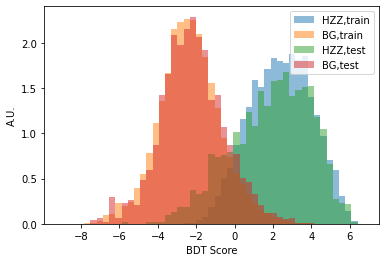

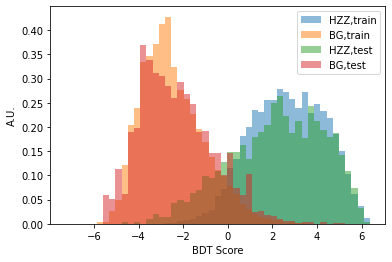

in 0 limit polp80 sklo 1.9287333488464355 Sig/BG 3.678294785087928 11.408811426110333 S/(S+B) 0.2438038636168511 S/sqrt(S+B)  0.9469859978511572
in 1 limit polp80 sklo 1.9494899438254198 Sig/BG 3.656643061200157 10.905923449405236 S/(S+B) 0.25109880586894867 S/sqrt(S+B)  0.9582164192688082
in 2 limit polp80 sklo 1.9702465388044041 Sig/BG 3.6299947856459767 10.609102066257037 S/(S+B) 0.2549315327650741 S/sqrt(S+B)  0.9619772006830284
in 3 limit polp80 sklo 1.9910031337833884 Sig/BG 3.605844785925001 10.088018334063236 S/(S+B) 0.26331830209853146 S/sqrt(S+B)  0.9744151716083929
in 4 limit polp80 sklo 2.0117597287623727 Sig/BG 3.5841930620372295 9.858122575096786 S/(S+B) 0.2666350916605468 S/sqrt(S+B)  0.977584597682161
in 5 limit polp80 sklo 2.032516323741357 Sig/BG 3.555879269260913 9.251879333372926 S/(S+B) 0.27763478213351617 S/sqrt(S+B)  0.9935973863765646
in 6 limit polp80 sklo 2.0532729187203413 Sig/BG 3.535893062595278 9.085335503797978 S/(S+B) 0.2801544274390495 S/sqrt(S+B)  0.99

in 29 limit polm80 sklo new best value 2.4026735471121627 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  16.43262549676001 73.37536393594928 0.1829750960973526 1.7340015079005757
in 30 limit polm80 sklo new best value 2.42286828534687 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  16.302000492811203 69.96608023019508 0.1889690874792318 1.7551564480730828
in 31 limit polm80 sklo new best value 2.4430630235815767 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  16.14089632127434 67.82537515717559 0.19223071403637265 1.761469847890002
in 32 limit polm80 sklo new best value 2.4632577618162834 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  16.027687984518707 64.3778787185438 0.19933555152603932 1.7874249701963185
in 33 limit polm80 sklo new best value 2.4834525000509906 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  15.918833814561367 62.99755071778782 0.20171772831326254 1.7919573082162605
in 34 limit polm80 sklo new best value 2.5036472382856974 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  15.840458812192082 61.619850914692506 0.20449774688538644 1.7998161396998433
in 35 limit

In [154]:
#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polp80_train_BG=sum_wpos_train_polp80/sum_wneg_train_polp80 
rescale_polp80_test_SIG=sum_wpos_train_polp80/sum_wpos_test_polp80
rescale_polp80_test_BG=sum_wpos_train_polp80/sum_wneg_test_polp80

ypred_polp80_test_skl_B=np.ma.masked_where(y_polp80_test==1,ypred_polp80_test_skl)
ypred_polp80_train_skl_B=np.ma.masked_where(y_polp80_train==1,ypred_polp80_train_skl)
ypred_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_polp80_test_skl)
ypred_polp80_train_skl_S=np.ma.masked_where(y_polp80_train==0,ypred_polp80_train_skl)

ypred_polm80_test_skl_B=np.ma.masked_where(y_polm80_test==1,ypred_polm80_test_skl)
ypred_polm80_train_skl_B=np.ma.masked_where(y_polm80_train==1,ypred_polm80_train_skl)
ypred_polm80_test_skl_S=np.ma.masked_where(y_polm80_test==0,ypred_polm80_test_skl)
ypred_polm80_train_skl_S=np.ma.masked_where(y_polm80_train==0,ypred_polm80_train_skl)

num_plot_polp80_min=1.2*min(np.min(ypred_polp80_train_skl_B),np.min(ypred_polp80_test_skl_B))
num_plot_polp80_max=1.2*max(np.max(ypred_polp80_train_skl_B),np.max(ypred_polp80_test_skl_B))

bins_polp80 = np.linspace(num_plot_polp80_min,num_plot_polp80_max,50)   

num_plot_polm80_min=1.2*min(np.min(ypred_polm80_train_skl_B),np.min(ypred_polm80_test_skl_B))
num_plot_polm80_max=1.2*max(np.max(ypred_polm80_train_skl_B),np.max(ypred_polm80_test_skl_B))

bins_polm80 = np.linspace(num_plot_polm80_min,num_plot_polm80_max,50) 

sum_wpos_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)
sum_wpos_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_polm80_train/sum_wneg_polm80_train 
rescale_polm80_test_SIG=sum_wpos_polm80_train/sum_wpos_polm80_test
rescale_polm80_test_BG=sum_wpos_polm80_train/sum_wneg_polm80_test

ypred_polp80_train_skl_B=ypred_polp80_train_skl_B.filled(2.*np.min(ypred_polp80_train_skl_B))
ypred_polp80_test_skl_B=ypred_polp80_test_skl_B.filled(2.*np.min(ypred_polp80_test_skl_B))
ypred_polp80_train_skl_S=ypred_polp80_train_skl_S.filled(2.*np.max(ypred_polp80_train_skl_S))
ypred_polp80_test_skl_S=ypred_polp80_test_skl_S.filled(2.*np.max(ypred_polp80_test_skl_S))

ypred_polm80_train_skl_B=ypred_polm80_train_skl_B.filled(2.*np.min(ypred_polm80_train_skl_B))
ypred_polm80_test_skl_B=ypred_polm80_test_skl_B.filled(2.*np.min(ypred_polm80_test_skl_B))
ypred_polm80_train_skl_S=ypred_polm80_train_skl_S.filled(2.*np.max(ypred_polm80_train_skl_S))
ypred_polm80_test_skl_S=ypred_polm80_test_skl_S.filled(2.*np.max(ypred_polm80_test_skl_S))

plt.figure(1)
hist_S_polm80_train_skl = plt.hist(ypred_polm80_train_skl_S, bins_polm80, alpha=0.5,weights=weight_polm80_array_train,label='HZZ,train')
hist_B_polm80_train_skl = plt.hist(ypred_polm80_train_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_train_BG*weight_polm80_array_train,label="BG,train")
hist_S_polm80_test_skl = plt.hist(ypred_polm80_test_skl_S, bins_polm80, alpha=0.5,weights=rescale_polm80_test_SIG*weight_polm80_array_test,label='HZZ,test')
hist_B_polm80_test_skl = plt.hist(ypred_polm80_test_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_test_BG*weight_polm80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.xlabel('BDT Score')    
plt.ylabel('A.U.')
plt.savefig("BDT_training_testing_polm80.pdf")
plt.show()

plt.figure(2)
hist_S_polp80_train_skl = plt.hist(ypred_polp80_train_skl_S, bins_polp80, alpha=0.5,weights=weight_polp80_array_train,label='HZZ,train')
hist_B_polp80_train_skl = plt.hist(ypred_polp80_train_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_train_BG*weight_polp80_array_train,label="BG,train")
hist_S_polp80_test_skl = plt.hist(ypred_polp80_test_skl_S, bins_polp80, alpha=0.5,weights=rescale_polp80_test_SIG*weight_polp80_array_test,label='HZZ,test')
hist_B_polp80_test_skl = plt.hist(ypred_polp80_test_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_test_BG*weight_polp80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.xlabel('BDT Score')
plt.ylabel('A.U.')
#plt.savefig("BDT_training_testing_polp80.pdf")
plt.show()

"""

num_plot_polp80_min=1.2*min(np.min(ypred_polp80_train_skl_B),np.min(ypred_polp80_test_skl_B))
num_plot_polm80_min=1.2*min(np.min(ypred_polm80_train_skl_B),np.min(ypred_polm80_test_skl_B))
  
bins_polp80 = np.linspace(num_plot_polp80_min,num_plot_polp80_max,50)    
bins_polm80 = np.linspace(num_plot_polm80_min,num_plot_polm80_max,50)  
    
#ypred_polp80_train_skl_B=ypred_polp80_train_skl_B.filled(2.*np.min(ypred_polp80_train_skl_B))
#ypred_polp80_test_skl_B=ypred_polp80_test_skl_B.filled(2.*np.min(ypred_polp80_train_skl_B))
print(ypred_polp80_train_skl_S)
#ypred_polp80_train_skl_S=ypred_polp80_train_skl_S.filled(2.*np.max(ypred_polp80_train_skl_S))
#ypred_polp80_test_skl_S=ypred_polp80_test_skl_S.filled(2.*np.max(ypred_polp80_test_skl_S))
#for i in range(len(ypred_polp80_train_skl_B)):
#    print("B/S",ypred_polp80_train_skl_B[i],ypred_polp80_train_skl_S[i])

#ypred_polm80_train_skl_B=ypred_polm80_train_skl_B.filled(2.*np.min(ypred_polm80_train_skl_B))
#ypred_polm80_test_skl_B=ypred_polm80_test_skl_B.filled(2.*np.min(ypred_polm80_train_skl_B))
#ypred_polm80_train_skl_S=ypred_polm80_train_skl_S.filled(2.*np.max(ypred_polm80_train_skl_S))
#ypred_polm80_test_skl_S=ypred_polm80_test_skl_S.filled(2.*np.max(ypred_polm80_train_skl_S))

rescale_polm80_train_BG=sum_wpos_train_polm80/sum_wneg_train_polm80 
rescale_polm80_test_SIG=sum_wpos_train_polm80/sum_wpos_test_polm80
rescale_polm80_test_BG=sum_wpos_train_polm80/sum_wneg_test_polm80

plt.figure(1)
hist_S_polm80_train_skl = plt.hist(ypred_polm80_train_skl_S, bins_polm80, alpha=0.5,weights=weight_polm80_array_train,label='HZZ,train')
hist_B_polm80_train_skl = plt.hist(ypred_polm80_train_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_train_BG*weight_polm80_array_train,label="BG,train")
hist_S_polm80_test_skl = plt.hist(ypred_polm80_test_skl_S, bins_polm80, alpha=0.5,weights=rescale_polm80_test_SIG*weight_polm80_array_test,label='HZZ,test')
hist_B_polm80_test_skl = plt.hist(ypred_polm80_test_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_test_BG*weight_polm80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.show()



print ('min/max B/S train/test',np.min(ypred_polp80_train_skl_B),np.max(ypred_polp80_train_skl_B),np.min(ypred_polp80_train_skl_S),np.max(ypred_polp80_train_skl_S),np.min(ypred_polp80_test_skl_B),np.max(ypred_polp80_test_skl_B),np.min(ypred_polp80_test_skl_S),np.max(ypred_polp80_test_skl_S))

#plt.figure(3)
#hist_S_polp80_train = plt.hist(ypred_polp80_train_skl_S, bins_polp80, alpha=0.5,weights=weight_polp80_array_train,label='HZZ,train')
##hist_B_polp80_train = plt.hist(ypred_polp80_train_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_train_BG*weight_polp80_array_train,label="BG,train")
#hist_S_polp80_test = plt.hist(ypred_polp80_test_skl_S, bins_polp80, alpha=0.5,weights=rescale_polp80_test_SIG*weight_polp80_array_test,label='HZZ,test')
#hist_B_polp80_test = plt.hist(ypred_polp80_test_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_test_BG*weight_polp80_array_test,label="BG,test")
#plt.show()
"""
count_sig_polp80_test_skl = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_test_skl=np.zeros(test_bins_BDT_polp80)
count_sig_polp80_train_skl = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_train_skl = np.zeros(test_bins_BDT_polp80)
count_sig_polp80_test = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_test=np.zeros(test_bins_BDT_polp80)
count_sig_polp80_train = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_train = np.zeros(test_bins_BDT_polp80)

count_sig_polm80_test_skl = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_test_skl=np.zeros(test_bins_BDT_polm80)
count_sig_polm80_train_skl = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_train_skl = np.zeros(test_bins_BDT_polm80)

max_sig_polm80_skl=0
max_sig_polm80_skl_j=-1
max_sig_polp80_skl=0
max_sig_polp80_skl_j=-1

for j in range (len(pred_lim_polp80)):
    for i in range(len(y_polp80_test)):
        if (sel_HHZ_polp80_test[i]==1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]):
            count_sig_polp80_test_skl[j]+=weight_polp80_array_test.item(i) 
        elif (sel_HHZ_polp80_test[i]!=1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]):
            count_BG_polp80_test_skl[j]+=weight_polp80_array_test.item(i) 
    for i in range(len(y_polp80_train)):
        if (sel_HHZ_polp80_train[i]==1 and ypred_polp80_train_skl[i]>pred_lim_polp80[j]):
            count_sig_polp80_train_skl[j]+=weight_polp80_array_train.item(i) 
        elif (sel_HHZ_polp80_train[i]!=1 and ypred_polp80_train_skl[i]>pred_lim_polp80[j]):
            count_BG_polp80_train_skl[j]+=weight_polp80_array_train.item(i) 
    if (count_sig_polp80_test_skl[j]+count_BG_polp80_test_skl[j])>0 and ((count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/math.sqrt(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j]) )>max_sig_polp80_skl :
        max_sig_polp80_skl=(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/math.sqrt(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j])
        max_sig_polp80_skl_j=j
        print("in",j,"limit polp80 sklo",pred_lim_polp80[max_sig_polp80_skl_j],'Sig/BG',count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j],count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j],"S/(S+B)", (count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j]),"S/sqrt(S+B) ",(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/math.sqrt(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j]))
print("best result_polp80 sklo",pred_lim_polp80[max_sig_polp80_skl_j],'Sig/BG ',count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j],count_BG_polp80_test_skl[max_sig_polp80_skl_j]+count_BG_polp80_train_skl[max_sig_polp80_skl_j],"S/(S+B)",(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j])/(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j]+count_BG_polp80_test_skl[max_sig_polp80_skl_j]+count_BG_polp80_train_skl[max_sig_polp80_skl_j]),"S/sqrt(S+B)",(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j])/math.sqrt(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j]+count_BG_polp80_test_skl[max_sig_polp80_skl_j]+count_BG_polp80_train_skl[max_sig_polp80_skl_j]))
print ("polp 80 numbers done")

for j in range (len(pred_lim_polm80)):
    for i in range(len(y_polm80_test)):
        if (sel_HHZ_polm80_test[i]==1 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]):
            count_sig_polm80_test_skl[j]+=weight_polm80_array_test.item(i) 
        elif (sel_HHZ_polm80_test[i]!=1 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]):
            count_BG_polm80_test_skl[j]+=weight_polm80_array_test.item(i)
    for i in range(len(y_polm80_train)):
        if (sel_HHZ_polm80_train[i]==1 and ypred_polm80_train_skl[i]>pred_lim_polm80[j]):
            count_sig_polm80_train_skl[j]+=weight_polm80_array_train.item(i) 
        elif (sel_HHZ_polm80_train[i]!=1 and ypred_polm80_train_skl[i]>pred_lim_polm80[j]):
            count_BG_polm80_train_skl[j]+=weight_polm80_array_train.item(i) 
    if ((count_sig_polm80_test_skl[j]+count_BG_polm80_test_skl[j])>0 and (((count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j])/math.sqrt(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polm80_train_skl[j]))>max_sig_polm80_skl)):
        max_sig_polm80_skl=(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j])/math.sqrt(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polm80_train_skl[j])
        max_sig_polm80_skl_j=j
        print("in",j,"limit polm80 sklo new best value",pred_lim_polm80[max_sig_polm80_skl_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j],count_BG_polm80_test_skl[j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j],(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]),(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/math.sqrt(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]))
print("best result_polm80 sklo",pred_lim_polm80[max_sig_polm80_skl_j],"Sig/BG "
      ,count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]
      ,count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j],"S/(S+B)",
      (count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]),
      "S/sqrt(S+B)",(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/math.sqrt(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]))
  

In [ ]:
"""
import matplotlib.pyplot as plt

sum_wpos_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)
sum_wpos_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_polm80_train/sum_wneg_polm80_train 
rescale_polm80_test_SIG=sum_wpos_polm80_train/sum_wpos_polm80_test
rescale_polm80_test_BG=sum_wpos_polm80_train/sum_wneg_polm80_test

modelfile_polm80 = '/Users/matthiasweber/jupytermacros/HHZModel_polm80.model'
bst_polm80 = xgb.Booster(model_file = modelfile_polm80)
ypred_polm80_test = bst_polm80.predict( xgmat_polm80_test )
ypred_polm80_train = bst_polm80.predict( xgmat_polm80_train )
label_polm80 = xgmat_polm80_train.get_label()

ypred_polm80_test_B=np.ma.masked_where(y_polm80_test==1,ypred_polm80_test)
ypred_polm80_test_S=np.ma.masked_where(y_polm80_test==0,ypred_polm80_test)
ypred_polm80_train_B=np.ma.masked_where(y_polm80_train==1,ypred_polm80_train)
ypred_polm80_train_S=np.ma.masked_where(y_polm80_train==0,ypred_polm80_train)
print ('min/max B/S train/test',np.min(ypred_polm80_train_B),np.max(ypred_polm80_train_B),np.min(ypred_polm80_train_S),np.max(ypred_polm80_train_S),np.min(ypred_polm80_test_B),np.max(ypred_polm80_test_B),np.min(ypred_polm80_test_S),np.max(ypred_polm80_test_S))

bins_polm80 = np.linspace(-1.2*np.min(ypred_polm80_train_B),1.2*np.max(ypred_polm80_train_S),50)
ypred_polm80_train_B=ypred_polm80_train_B.filled(-2.*np.min(ypred_polm80_train_B))
ypred_polm80_train_S=ypred_polm80_train_S.filled(2.*np.max(ypred_polm80_train_S))
ypred_polm80_test_B=ypred_polm80_test_B.filled(-2.*np.min(ypred_polm80_train_B))
ypred_polm80_test_S=ypred_polm80_test_S.filled(2.*np.max(ypred_polm80_train_S))
hist_S_polm80_train = plt.hist(ypred_polm80_train_S, bins_polm80, alpha=0.5,weights=weight_polm80_array_train,label='HZZ,train')
hist_B_polm80_train = plt.hist(ypred_polm80_train_B, bins_polm80, alpha=0.5,weights=rescale_polm80_train_BG*weight_polm80_array_train,label="BG,train")
hist_S_polm80_test = plt.hist(ypred_polm80_test_S, bins_polm80, alpha=0.5,weights=rescale_polm80_test_SIG*weight_polm80_array_test,label='HZZ,test')
hist_B_polm80_test = plt.hist(ypred_polm80_test_B, bins_polm80, alpha=0.5,weights=rescale_polm80_test_BG*weight_polm80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.show()
count_sig_polm80_test = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_test_skl=np.zeros(test_bins_BDT_polm80)
count_sig_polm80_train = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_train_skl = np.zeros(test_bins_BDT_polm80)
"""
"""
for i in range(len(ypred_polm80_test)):
    if (y_polm80_test[i]==1):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_test[i]>pred_lim_polm80[j]):
                count_sig_polm80_test[j]=count_sig_polm80_test[j]+weight_polm80_array_test.item(i)
    else:
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_test[i]>pred_lim_polm80[j]):
                count_BG_polm80_test_skl[j]=count_BG_polm80_test_skl[j]+weight_polm80_array_test.item(i)
for i in range(len(ypred_polm80_train)):
    if (y_polm80_train[i]==1):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_train[i]>pred_lim_polm80[j]):
                count_sig_polm80_train[j]=count_sig_polm80_train[j]+weight_polm80_array_train.item(i)
    else:
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_train[i]>pred_lim_polm80[j]):
                count_BG_polm80_train_skl[j]=count_BG_polm80_train_skl[j]+weight_polm80_array_train.item(i)
max_sig_polm80=0
max_sig_polm80_j=-1
for j in range (len(pred_lim_polm80)):
    if (count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j])>0 and ((count_sig_polm80_train[j]+count_sig_polm80_test[j])/math.sqrt(count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]))>max_sig_polm80:
        max_sig_polm80=(count_sig_polm80_train[j]+count_sig_polm80_test[j])/math.sqrt(count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j])
        max_sig_polm80_j=j
"""
print("best result_polm80",pred_lim_polm80[max_sig_polm80_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j],count_BG_polm80_train_skl[max_sig_polm80_j]+count_BG_polm80_test_skl[max_sig_polm80_j],(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j])/(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j]+count_BG_polm80_train_skl[max_sig_polm80_j]+count_BG_polm80_test_skl[max_sig_polm80_j]),(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j])/math.sqrt(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j]+count_BG_polm80_train_skl[max_sig_polm80_j]+count_BG_polm80_test_skl[max_sig_polm80_j]))

In [162]:
file_polp80_hhz_signal_AllEvents=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14365_AllEvents.root")
tree_polp80_hhz_signal_AllEvents = file_polp80_hhz_signal_AllEvents["MVATrainingVariables"]

df_polp80_HHZ_AllEvents=tree_polp80_hhz_signal_AllEvents.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                                    "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                                    "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                                    "LTag_sum_all","jet*_E","jet*_theta"])
data_polp80_HHZ_AllEvents=df_polp80_HHZ_AllEvents.iloc[:,1:]
weight_polp80_HHZ_AllEvents = df_polp80_HHZ_AllEvents.iloc[:,0]
weight_polp80_array_HHZ_AllEvents=np.asarray(weight_polp80_HHZ_AllEvents)
xgmat_polp80_HHZ_AllEvents = xgb.DMatrix( data_polp80_HHZ_AllEvents, label=y_polp80_train, missing = -999.0, weight=weight_polp80_HHZ_AllEvents )
bst_polp80 = xgb.Booster()
bst_polp80.load_model(modelfile_polp80_sklearn)
ypred_polp80_HHZ_AllEvents= bst_polp80.predict( xgmat_polp80_HHZ_AllEvents )
#print(ypred_polp80_HHZ_AllEvents.shape,ypred_polp80_test_skl.shape,ypred_polp80_train_skl.shape)
#print(ypred_polm80_HHZ_AllEvents.shape,ypred_polm80_test_skl.shape,ypred_polm80_train_skl.shape)
count_sig_polp80_HHZ_AllEvents = np.zeros(test_bins_BDT_polp80)
for i in range(len(ypred_polp80_HHZ_AllEvents)):
        for j in range (len(pred_lim_polp80)):
            if (ypred_polp80_HHZ_AllEvents[i]>pred_lim_polp80[j]):
                count_sig_polp80_HHZ_AllEvents[j]+=weight_polp80_array_HHZ_AllEvents.item(i)
max_sig_polp80_HHZ_All=0
max_sig_polp80_HHZ_All_j=-1
for j in range (len(pred_lim_polp80)):
    if(count_sig_polp80_HHZ_AllEvents[j]<(count_sig_polp80_train_skl[j]+count_sig_polp80_test_skl[j])):
        print("all should be more than bbbbqq events",count_sig_polp80_HHZ_AllEvents[j],count_sig_polp80_train_skl[j]+count_sig_polp80_test_skl[j])
    if (count_sig_polp80_HHZ_AllEvents[j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[j]+count_BG_polp80_train_skl[j]+count_BG_polp80_test_skl[j]))>max_sig_polp80_HHZ_All:
        max_sig_polp80_HHZ_All=count_sig_polp80_HHZ_AllEvents[j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[j]+count_BG_polp80_train_skl[j]+count_BG_polp80_test_skl[j])
        max_sig_polp80_HHZ_All_j=j
print("best result_polp80",pred_lim_polp80[max_sig_polp80_HHZ_All_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j],count_BG_polp80_train_skl[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test_skl[max_sig_polp80_HHZ_All_j],count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]/(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test_skl[max_sig_polp80_HHZ_All_j]),count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test_skl[max_sig_polp80_HHZ_All_j]))
#now do the negativ results
file_polm80_hhz_signal_AllEvents=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14364_AllEvents.root")
tree_polm80_hhz_signal_AllEvents = file_polm80_hhz_signal_AllEvents["MVATrainingVariables"]

df_polm80_HHZ_AllEvents=tree_polm80_hhz_signal_AllEvents.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                                    "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                                    "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                                    "LTag_sum_all","jet*_E","jet*_theta"])
data_polm80_HHZ_AllEvents=df_polm80_HHZ_AllEvents.iloc[:,1:]
weight_polm80_HHZ_AllEvents = df_polm80_HHZ_AllEvents.iloc[:,0]
weight_polm80_array_HHZ_AllEvents=np.asarray(weight_polm80_HHZ_AllEvents)
xgmat_polm80_HHZ_AllEvents = xgb.DMatrix( data_polm80_HHZ_AllEvents, label=y_polm80_train, missing = -999.0, weight=weight_polm80_HHZ_AllEvents )
bst_polm80 = xgb.Booster()
bst_polm80.load_model(modelfile_polm80_sklearn)
ypred_polm80_HHZ_AllEvents= bst_polm80.predict( xgmat_polm80_HHZ_AllEvents )
count_sig_polm80_HHZ_AllEvents = np.zeros(test_bins_BDT_polm80)
for i in range(len(ypred_polm80_HHZ_AllEvents)):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_HHZ_AllEvents[i]>pred_lim_polm80[j]):
                count_sig_polm80_HHZ_AllEvents[j]+=weight_polm80_array_HHZ_AllEvents.item(i)
max_sig_polm80_HHZ_All=0
max_sig_polm80_HHZ_All_j=-1
for j in range (len(pred_lim_polm80)):
    if(count_sig_polm80_HHZ_AllEvents[j]<(count_sig_polm80_train_skl[j]+count_sig_polm80_test_skl[j])):
        print("all polm80 should be more than bbbbqq events",count_sig_polm80_HHZ_AllEvents[j],count_sig_polm80_train_skl[j]+count_sig_polm80_test_skl[j])
    if (count_sig_polm80_HHZ_AllEvents[j]/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]))>max_sig_polm80_HHZ_All:
        max_sig_polm80_HHZ_All=(count_sig_polm80_HHZ_AllEvents[j])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j])
        max_sig_polm80_HHZ_All_j=j
print("best result_polm80",pred_lim_polm80[max_sig_polm80_HHZ_All_j],
      'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j],count_BG_polm80_train_skl[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_HHZ_All_j],
      count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]/(count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]+count_BG_polm80_train_skl[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_HHZ_All_j]),
      count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]/math.sqrt(count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]+count_BG_polm80_train_skl[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_HHZ_All_j]))

max_sig_polm80_polp80_HHZ_All=0
max_sig_polm80_comb_HHZ_All_j=-1
max_sig_polp80_comb_HHZ_All_i=-1

for j in range(len(pred_lim_polm80)):
    #print("all, sig polm80 ",j,count_sig_polm80_HHZ_AllEvents[j],count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j])
    for i in range(len(pred_lim_polp80)):
        #print("all, sig polp80 ",i,count_sig_polp80_HHZ_AllEvents[i],count_sig_polp80_test_skl[i]+count_sig_polp80_train_skl[i])
        if (count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])>0 and ((count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polp80_train_skl[i]+count_BG_polp80_test_skl[i]))>max_sig_polm80_polp80_HHZ_All:
            max_sig_polm80_polp80_HHZ_All=(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polp80_train_skl[i]+count_BG_polp80_test_skl[i])
            max_sig_polm80_comb_HHZ_All_j=j
            max_sig_polp80_comb_HHZ_All_i=i   
            
count_tot_hhz_polp80_skl=0
count_tot_hzqq_polp80_skl=0
count_tot_ee_qq_polp80_skl=0
count_tot_ee_qqqq_polp80_skl=0
count_tot_ee_qqqqqq_polp80_skl=0
count_tot_WWH_qqqqH_polp80_skl=0
count_tot_ZZH_qqqqH_polp80_skl=0
count_tot_hhz_polm80_skl=0
count_tot_hzqq_polm80_skl=0
count_tot_ee_qq_polm80_skl=0
count_tot_ee_qqqq_polm80_skl=0
count_tot_ee_qqqqqq_polm80_skl=0
count_tot_WWH_qqqqH_polm80_skl=0
count_tot_ZZH_qqqqH_polm80_skl=0

for i1 in range(len(y_polm80_test)):
    if sel_HHZ_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hhz_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_hzqq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hzqq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ee_qq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ee_qqqq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ee_qqqqqq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqqqq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_WWH_qqqqH_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_WWH_qqqqH_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ZZH_qqqqH_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ZZH_qqqqH_polm80_skl+=weight_polm80_array_test.item(i1) 
for i1 in range(len(y_polm80_train)):
    if sel_HHZ_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hhz_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_hzqq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hzqq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ee_qq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ee_qqqq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ee_qqqqqq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqqqq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_WWH_qqqqH_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_WWH_qqqqH_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ZZH_qqqqH_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ZZH_qqqqH_polm80_skl+=weight_polm80_array_train.item(i1) 
for i1 in range(len(y_polp80_test)):
    if sel_HHZ_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hhz_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_hzqq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hzqq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ee_qq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ee_qqqq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ee_qqqqqq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqqqq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_WWH_qqqqH_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_WWH_qqqqH_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ZZH_qqqqH_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ZZH_qqqqH_polp80_skl+=weight_polp80_array_test.item(i1) 
for i1 in range(len(y_polp80_train)):
    if sel_HHZ_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hhz_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_hzqq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hzqq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ee_qq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ee_qqqq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ee_qqqqqq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqqqq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_WWH_qqqqH_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_WWH_qqqqH_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ZZH_qqqqH_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ZZH_qqqqH_polp80_skl+=weight_polp80_array_train.item(i1)       
            
print("best result_polm80_polp80 combined",pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j],pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i],      
      'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j],count_BG_polp80_train_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train_skl[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_comb_HHZ_All_j],
      (count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j])/(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train_skl[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_comb_HHZ_All_j]),
      (count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j])/math.sqrt(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train_skl[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_comb_HHZ_All_j]))
print("all sig/hzqq/qq/qqqq/qqqqqq/WWH/ZZH",count_tot_hhz_polp80_skl+count_tot_hhz_polm80_skl,count_tot_hzqq_polp80_skl+count_tot_hzqq_polm80_skl,count_tot_ee_qq_polp80_skl+count_tot_ee_qq_polm80_skl,
     count_tot_ee_qqqq_polp80_skl+count_tot_ee_qqqq_polm80_skl,count_tot_ee_qqqqqq_polp80_skl+count_tot_ee_qqqqqq_polm80_skl,
     count_tot_WWH_qqqqH_polp80_skl+count_tot_WWH_qqqqH_polm80_skl,count_tot_ZZH_qqqqH_polp80_skl+count_tot_ZZH_qqqqH_polm80_skl)


(11364,) (7465,) (29860,)
(12577,) (20732,) (82924,)
best result_polp80 2.489161413279011 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  3.804874093970284 5.027775249938713 0.43077381947627397 1.2802500326443684
best result_polm80 3.1902683382657306 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  13.140875397250056 14.27043958636932 0.4793960233247789 2.5099170122631747
best result_polm80_polp80 combined 3.1902683382657306 2.489161413279011 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  16.94574949122034 19.298214836308034 0.4675467986361949 2.81477013717124
all sig/hzqq/qq/qqqq/qqqqqq/WWH/ZZH 14.076668115565553 1.5235996395349503 0 0.25050100684165955 9.571410833188565 1.2181634157896042 6.734539940953255
